## Generate learning curves and tables for the paper

https://www.delftstack.com/howto/matplotlib/how-to-plot-logarithmic-axes-in-matplotlib/

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# from load_modules import *
import os
import sys
sys.path.append('../src')
from post_process import *

%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

Current path: /vol/ml/apartin/projects/dr-learning-curves/nbs


In [2]:
# Settings
drop_bad_r2fit = False
# drop_bad_r2fit = True
dpi = 300

# save_plot = False
save_plot = True

# save_table = False
save_table = True

## Path to data

In [3]:
fname = 'all_scores.csv'
outpath = fpath/'../lc.fits/cmpr_models_ci'
os.makedirs(outpath, exist_ok=True)

In [4]:
# src = 'GDSC1'
# src = 'GDSC2'
# src = 'CTRP'
src = 'NCI-60'

dgb_label = 'dGBDT'
hgb_label = 'hGBDT'
snn_label = 'sNN'
mnn_label = 'mNN'

dpath = fpath/'../lc.raw'

if src == 'GDSC1':
    snn_path = Path(dpath, 'lc.gdsc1.sNN', fname)
    mnn_path = Path(dpath, 'lc.gdsc1.mNN', fname)
    hgb_path = Path(dpath, 'lc.gdsc1.hGBDT', fname)
    dgb_path = Path(dpath, 'lc.gdsc1.dGBDT', fname)
    xlabels_log = 2 ** np.arange(14, 18)  # GDSC1

if src == 'GDSC2':
    snn_path = Path(dpath, 'lc.gdsc2.sNN', fname)
    mnn_path = Path(dpath, 'lc.gdsc2.mNN', fname)
    hgb_path = Path(dpath, 'lc.gdsc2.hGBDT', fname)
    dgb_path = Path(dpath, 'lc.gdsc2.dGBDT', fname)
    xlabels_log = 2 ** np.arange(14, 17)  # GDSC2

if src == 'CTRP':
    snn_path = Path(dpath, 'lc.ctrp.sNN', fname)
    mnn_path = Path(dpath, 'lc.ctrp.mNN', fname)
    hgb_path = Path(dpath, 'lc.ctrp.hGBDT', fname)
    dgb_path = Path(dpath, 'lc.ctrp.dGBDT', fname)
    xlabels_log = 2 ** np.arange(15, 19)  # CTRP

if src == 'NCI-60':
    snn_path = Path(dpath, 'lc.nci60.sNN', fname)
    mnn_path = Path(dpath, 'lc.nci60.mNN', fname)
    hgb_path = Path(dpath, 'lc.nci60.hGBDT', fname)
    dgb_path = Path(dpath, 'lc.nci60.dGBDT', fname)
    xlabels_log = 2 ** np.arange(16, 21)  # NCI-60

## Load data

In [5]:
dgb = load_data(dgb_path, tr_set='te');
hgb = load_data(hgb_path, tr_set='te');
snn = load_data(snn_path, tr_set='te');
mnn = load_data(mnn_path, tr_set='te');

# print_count(aa=dgb)
# print_count(aa=hgb)
# print_count(aa=snn)
# print_count(aa=mnn)

if drop_bad_r2fit:
    snn = drop_bad_r2(snn)
    mnn = drop_bad_r2(mnn)
    hgb = drop_bad_r2(hgb)
    dgb = drop_bad_r2(dgb)
    
# NCI60: remove bad samples
if src == 'NCI-60':
    # np.unique(sorted(snn.tr_size))
    snn = snn[ ~snn['tr_size'].isin([369806, 499618, 580947, 610743, 625000]) ].reset_index(drop=True)
    mnn = mnn[ ~mnn['tr_size'].isin([369806, 499618, 580947, 610743, 625000]) ].reset_index(drop=True)

## Plot LC_raw each source

In [6]:
# -----------
# Plot params
# -----------
legend_fontsize = 12
met = 'mean_absolute_error';  # startParams = {'a': 1.2, 'b': -0.4, 'c': 0.04}

t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
# xtick_scale = 'linear'
# ytick_scale = 'linear'

kwargs = {'metric_name': met,
          'tr_set': t_set,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale,
          'plot_median': False,
          'plot_shade': False}

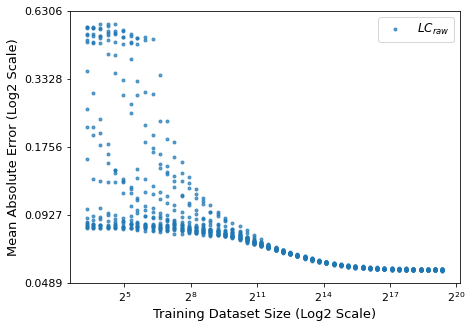

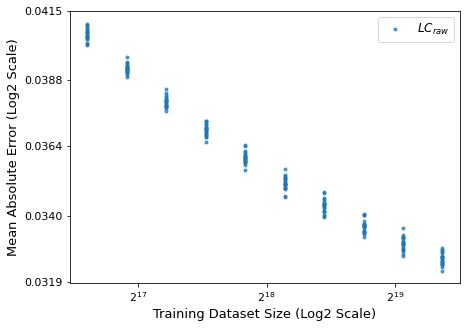

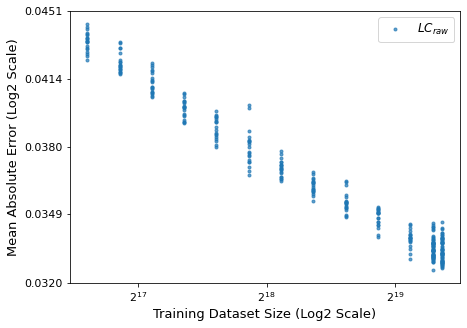

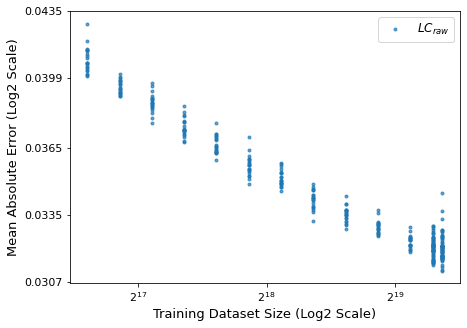

In [7]:
# ----------------
# Plot dGBDT (dgb)
# ----------------
if dgb is not None:
    # plot_lc_model(df=dgb, src_name=src, label=dgb_label, **kwargs)
    ax = lc_plots.plot_lc_single_metric(dgb, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    
if hgb is not None:
    # plot_lc_model(df=hgb, src_name=src, label=hgb_label, **kwargs)  
    ax = lc_plots.plot_lc_single_metric(hgb, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    
if snn is not None:
    # plot_lc_model(df=snn, src_name=src, label=snn_label, **kwargs)
    ax = lc_plots.plot_lc_single_metric(snn, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    
if mnn is not None:
    # plot_lc_model(df=mnn, src_name=src, label=mnn_label, **kwargs)
    ax = lc_plots.plot_lc_single_metric(mnn, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')

## Plot LC_raw combined

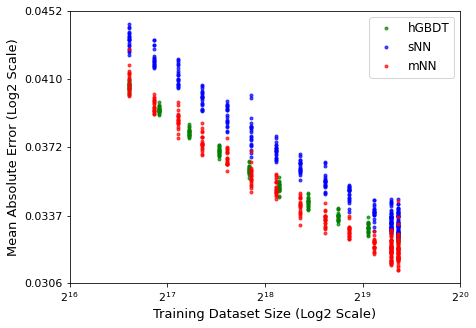

In [8]:
# --------------------
# Plot LC_raw combined
# --------------------
ax = None

kwargs = {'metric_name': met,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale,
          'xlabels_log': xlabels_log}

# if dgb is not None:
#     dgb = dgb[ dgb.metric==met ].reset_index(drop=True)
#     ax = lc_plots.plot_lc(x=dgb['tr_size'].values, y=dgb['score'].values,
#                           color='m', label=f'{dgb_label}', **kwargs, ax=ax);

if hgb is not None:
    hgb = hgb[ hgb.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=hgb['tr_size'].values,
                          y=hgb['score'].values,
                          color='g', label=f'{hgb_label}', **kwargs, ax=ax);

if snn is not None:
    snn = snn[ snn.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=snn['tr_size'].values,
                          y=snn['score'].values,
                          color='b', label=f'{snn_label}', **kwargs, ax=ax);

if mnn is not None:
    mnn = mnn[ mnn.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=mnn['tr_size'].values,
                          y=mnn['score'].values,
                          color='r', label=f'{mnn_label}', **kwargs, ax=ax);

ax.legend(frameon=True, fontsize=legend_fontsize, loc='best');
ax.grid(False)

In [9]:
# snn[snn.tr_size == snn.tr_size.max()].score.values
# mnn[mnn.tr_size == mnn.tr_size.max()].score.values

## Determine LC_f

In [10]:
# --------------
# Determine LC_f
# --------------
if src == 'GDSC1':
    # x_fit_mn = 1000;
    x_fit_mn = 20000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

elif src == 'GDSC2':
    # x_fit_mn = 10000;
    x_fit_mn = 20000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

elif src == 'CTRP':
    # x_fit_mn = 1000;
    x_fit_mn = 50000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}    

elif src == 'NCI-60':    
    x_fit_mn = 100000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

# Dataframes to fit
dfit_dgb = fit_data(dgb, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx, only_median=False)
dfit_hgb = fit_data(hgb, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx, only_median=False)
dfit_snn = fit_data(snn, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx, only_median=False)
dfit_mnn = fit_data(mnn, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx, only_median=False)

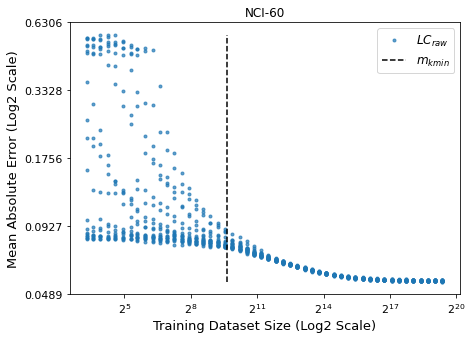

In [11]:
# ------------------------
# Add m_kmin vertical line
# ------------------------
kwargs = {'metric_name': met,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale}

x_fit_mn = 800

x = np.ones((50,)) * x_fit_mn
vmin = dgb[dgb['metric'] == met].reset_index(drop=True).score.min()
vmax = dgb[dgb['metric'] == met].reset_index(drop=True).score.max()
y = np.logspace(start=vmin, stop=vmax, num=50, endpoint=True, base=2.0, dtype=None, axis=0)
y = np.linspace(start=vmin, stop=vmax, num=50, endpoint=True)

# LC_raw
ax = lc_plots.plot_lc_single_metric(dgb, plot_median=False, **kwargs);

# Plot
p = ax.plot(x, y, ls='--',  color='k', label='$m_{kmin}$');

ax.legend(frameon=True, fontsize=legend_fontsize, loc='best');
ax.set_title(src)
lc_plots.set_yticks(ax)

if save_plot:
    plt.savefig(outpath/f'{dgb_label}_{src}.png', dpi=dpi)

R[write to console]: Loading required package: broom

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




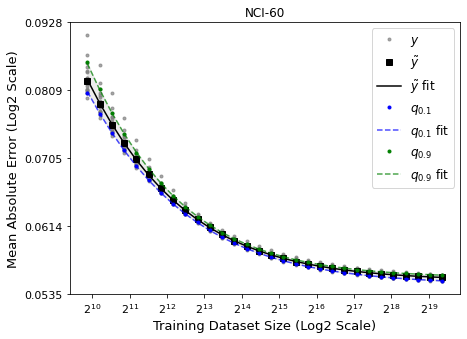

In [12]:
if src == 'GDSC1':
    kwargs = {'xlabels_log': 2 ** np.arange(10, 18)}  # GDSC1
elif src == 'GDSC2':
    kwargs = {'xlabels_log': 2 ** np.arange(10, 17)}  # GDSC2
elif src == 'CTRP':
    kwargs = {'xlabels_log': 2 ** np.arange(10, 19)}  # CTRP
elif src == 'NCI-60':
    kwargs = {'xlabels_log': 2 ** np.arange(10, 20)}  # NCI-60

x_fit_mn = 800
dfit = fit_data(dgb, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx, only_median=False)

data_fitted, ci_dgb, prm_dgb = fit_and_ci(dfit);
ax = plot_lc_fit_ci(data_fitted=data_fitted, ci=ci_dgb, lc_raw=True, median=True, ci_lines=True, ci_shade=True, title=f'{src}', **kwargs);

if save_plot:
    plt.savefig(outpath/f'{dgb_label}_{src}_fit.png', dpi=dpi)

In [13]:
dfit
dfs = []

# Iter over runs and fit the LC data
for run_name in dfit['run'].unique():
    data_fit = dfit[ dfit['run'] == run_name ].sort_values(by='tr_size').reset_index(drop=True)

    # At least 3 fitting points are required
    if len(data_fit) < 4:
        continue

    xf = data_fit['tr_size'].values
    yf = data_fit['score'].values
    w  = data_fit['w'].values

    prms = fit_params(x=xf, y=yf)
    data_fit['score_fit'] = biased_powerlaw(xf, **prms)
    dfs.append(data_fit)

    del prms

# Concat results
data_fitted = pd.concat(dfs, axis=0).reset_index(drop=True)

## Fit LC_f

In [14]:
kwargs = {'xlabels_log': xlabels_log}

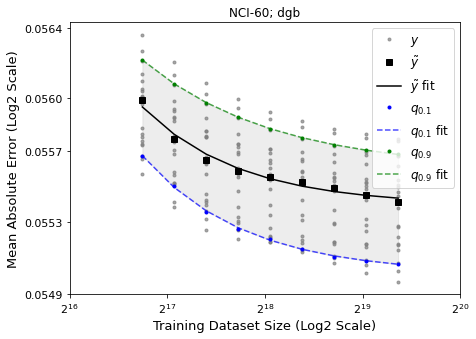

In [15]:
data_fitted, ci_dgb, prm_dgb = fit_and_ci(dfit_dgb);
# ax = plot_lc_fit_ci(data_fitted=data_fitted, ci=ci_dgb, lc_raw=True, median=True, ci_lines=True, ci_shade=True, title=f'{src}; dgb', **kwargs);

ax = plot_lc_fit_ci(data_fitted=data_fitted, ci=ci_dgb, lc_raw=True, median=True, ci_lines=True, ci_shade=True, title=f'{src}; dgb', **kwargs);

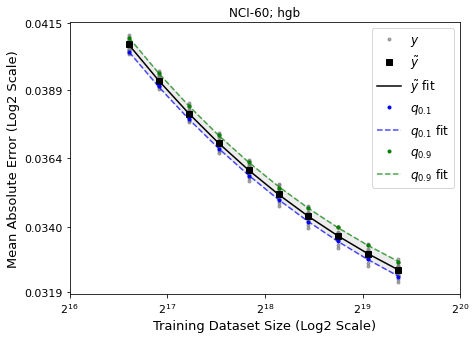

In [16]:
data_fitted, ci_hgb, prm_hgb = fit_and_ci(dfit_hgb);
ax = plot_lc_fit_ci(data_fitted=data_fitted, ci=ci_hgb, lc_raw=True, median=True, ci_lines=True, ci_shade=True, title=f'{src}; hgb', **kwargs);

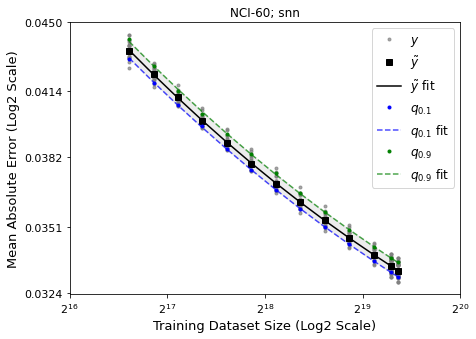

In [17]:
data_fitted, ci_snn, prm_snn = fit_and_ci(dfit_snn);
ax = plot_lc_fit_ci(data_fitted=data_fitted, ci=ci_snn, lc_raw=True, median=True, ci_lines=True, ci_shade=True, title=f'{src}; snn', **kwargs);

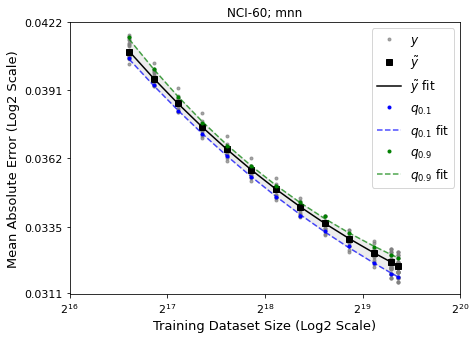

In [18]:
data_fitted, ci_mnn, prm_mnn = fit_and_ci(dfit_mnn);
ax = plot_lc_fit_ci(data_fitted=data_fitted, ci=ci_mnn, lc_raw=True, median=True, ci_lines=True, ci_shade=True, title=f'{src}; mnn', **kwargs);

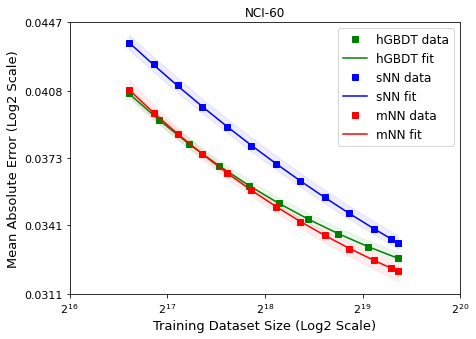

In [19]:
ax = None
ax = plot_lc_fit_ci(data_fitted=None, ci=ci_hgb, ax=ax, med_color='g', lc_raw=True, median=True, ci_lines=False, ci_shade=True, name='hGBDT', title=f'{src}; hgb', **kwargs);
ax = plot_lc_fit_ci(data_fitted=None, ci=ci_snn, ax=ax, med_color='b', lc_raw=True, median=True, ci_lines=False, ci_shade=True, name='sNN', title=f'{src}; snn', **kwargs);
ax = plot_lc_fit_ci(data_fitted=None, ci=ci_mnn, ax=ax, med_color='r', lc_raw=True, median=True, ci_lines=False, ci_shade=True, name='mNN', title=f'{src}; mnn', **kwargs);

ax.set_title(f'{src}')
ax.legend(frameon=True, fontsize=12, loc='best')
ax.grid(False)

ax.tick_params(axis='both', labelsize=11)
ax = lc_plots.set_yticks(ax)
ax = lc_plots.set_xticks(ax, xlabels_log, show_log=True)

if save_plot:
    plt.savefig(outpath/f'{src}_fits.png', dpi=dpi)

## Percent improve compared to baseline (dGBDT)

In [20]:
# --------------------------------------------
# Percent improve compared to baseline (dGBDT)
# --------------------------------------------

# score value at the full training size for each learning algorithm
v_dGBDT = ci_dgb.loc[:,'med_fit'].values[-1]
v_hGBDT = ci_hgb.loc[:,'med_fit'].values[-1]
v_sNN = ci_snn.loc[:,'med_fit'].values[-1]
v_mNN = ci_mnn.loc[:,'med_fit'].values[-1]

# dGBDT
df_dgb = ci_dgb.iloc[-1:, :]
df_dgb['model'] = 'dGBDT'
df_dgb['Ds'] = np.nan  # delta

# hGBDT
df_hgb = ci_hgb.iloc[-1:, :]
df_hgb['model'] = 'hGBDT'
df_hgb['Ds'] = np.around((v_dGBDT - v_hGBDT)/v_dGBDT * 100, 2)  # delta

# sNN
df_snn = ci_snn.iloc[-1:, :]
df_snn['model'] = 'sNN'
df_snn['Ds'] = np.around((v_dGBDT - v_sNN)/v_dGBDT * 100, 2)  # delta

# mNN
df_mnn = ci_mnn.iloc[-1:, :]
df_mnn['model'] = 'mNN'
df_mnn['Ds'] = np.around((v_dGBDT - v_mNN)/v_dGBDT * 100, 2)  # delta

# Concat
df = pd.concat([df_dgb, df_hgb, df_snn, df_mnn], axis=0).reset_index(drop=True)
df.insert(loc=0, column='dataset', value=src, allow_duplicates=True)
df = df.rename(columns={'med_fit': 'sK'})
df = df[['dataset', 'tr_size', 'model', 'sK', 'Ds']]

df_improve = df
del df
display(df_improve)

if save_table:
    df_improve.to_csv(outpath/f'percent_imporve_{src}.csv', index=False)

,dataset,tr_size,model,sK,Ds
0,NCI-60,674999,dGBDT,0.055436,NaN
1,NCI-60,674999,hGBDT,0.032616,41.16
2,NCI-60,674999,sNN,0.033292,39.95
3,NCI-60,674999,mNN,0.032059,42.17


## Calc GOF

In [21]:
# --------
# Calc gof
# --------

gof_dgb = calc_gof(y=ci_dgb['median'].values, yfit=ci_dgb['med_fit'].values); gof_dgb['model'] = 'dGBDT'
gof_hgb = calc_gof(y=ci_hgb['median'].values, yfit=ci_hgb['med_fit'].values); gof_hgb['model'] = 'hGBDT'
gof_snn = calc_gof(y=ci_snn['median'].values, yfit=ci_snn['med_fit'].values); gof_snn['model'] = 'sNN'
gof_mnn = calc_gof(y=ci_mnn['median'].values, yfit=ci_mnn['med_fit'].values); gof_mnn['model'] = 'mNN'

gof_df = pd.DataFrame([gof_dgb, gof_hgb, gof_snn, gof_mnn])
gof_df = gof_df[['model', 'rmse', 'mae', 'r2']]
gof_df.insert(loc=0, column='dataset', value=src, allow_duplicates=True)
display(gof_df)

if save_table:
    gof_df.to_csv(outpath/f'gof_{src}.csv', index=False)

,dataset,model,rmse,mae,r2
0,NCI-60,dGBDT,0.000023,0.000021,0.980479
1,NCI-60,hGBDT,0.000010,0.000008,0.999985
2,NCI-60,sNN,0.000029,0.000021,0.999924
3,NCI-60,mNN,0.000011,0.000009,0.999986


## Estimated power-law params

In [22]:
# --------------------------
# Estimated power-law params
# --------------------------
def dct_prm_to_df(prm):
    dct_list = []
    for k, dct in prm.items():
        dct_copy = dct.copy()
        dct_copy['set'] = k
        dct_list.append(dct_copy)
    return pd.DataFrame(dct_list)

dfs = []
for prm_dct, model_name in zip([prm_dgb, prm_hgb, prm_snn, prm_mnn], ['dGBDT', 'hGBDT', 'sNN', 'mNN']):
    prm = dct_prm_to_df(prm_dct)
    prm['model'] = model_name
    dfs.append(prm)
    
prms_df = pd.concat(dfs, axis=0).reset_index(drop=True)
prms_df = prms_df[['model', 'set', 'alpha', 'beta', 'gamma']]
prms_df.insert(loc=0, column='dataset', value=src, allow_duplicates=True)
display(prms_df)

if save_table:
    prms_df.to_csv(outpath/f'prms_{src}.csv', index=False)

,dataset,model,set,alpha,beta,gamma
0,NCI-60,dGBDT,median,11175.865781,-1.448994,0.055396
1,NCI-60,dGBDT,ci_lwr,7099.429441,-1.394732,0.055013
2,NCI-60,dGBDT,ci_upr,187.707336,-1.087059,0.055596
3,NCI-60,hGBDT,median,11.028766,-0.594019,0.028816
4,NCI-60,hGBDT,ci_lwr,8.063227,-0.565327,0.028333
5,NCI-60,hGBDT,ci_upr,10.973216,-0.593320,0.029068
6,NCI-60,sNN,median,1.684242,-0.387116,0.023964
7,NCI-60,sNN,ci_lwr,1.511858,-0.377669,0.023531
8,NCI-60,sNN,ci_upr,1.581550,-0.379337,0.023893
9,NCI-60,mNN,median,7.333347,-0.546675,0.027289


## Extrapolate

In [23]:
reduce_percent = 0.9

dGBDT = {}
dGBDT['model'] = 'dGBDT'
dGBDT['m_func_s'] = inv_powerlaw(reduce_percent * ci_dgb['median'].values[-1], prm_dgb['median'])
dGBDT['s2T'] = get_score_at_2mK(ci_dgb, prm_dgb['median'])

hGBDT = {}
hGBDT['model'] = 'hGBDT'
hGBDT['m_func_s'] = inv_powerlaw(reduce_percent * ci_hgb['median'].values[-1], prm_hgb['median'])
hGBDT['s2T'] = get_score_at_2mK(ci_hgb, prm_hgb['median'])

snn = {}
snn['model'] = 'sNN'
snn['m_func_s'] = inv_powerlaw(reduce_percent * ci_snn['median'].values[-1], prm_snn['median'])
snn['s2T'] = get_score_at_2mK(ci_snn, prm_snn['median'])

mnn = {}
mnn['model'] = 'mNN'
mnn['m_func_s'] = inv_powerlaw(reduce_percent * ci_mnn['median'].values[-1], prm_mnn['median'])
mnn['s2T'] = get_score_at_2mK(ci_mnn, prm_mnn['median'])

df_ext = pd.DataFrame([dGBDT, hGBDT, snn, mnn])

In [24]:
display(df_ext)
display(df_improve)

,model,m_func_s,s2T
0,dGBDT,NaN,0.055411
1,hGBDT,18355942.0,0.031334
2,sNN,2109907.0,0.031097
3,mNN,5175827.0,0.030555


,dataset,tr_size,model,sK,Ds
0,NCI-60,674999,dGBDT,0.055436,NaN
1,NCI-60,674999,hGBDT,0.032616,41.16
2,NCI-60,674999,sNN,0.033292,39.95
3,NCI-60,674999,mNN,0.032059,42.17


In [25]:
dff = df_ext.merge(df_improve, on='model')
dff = dff[['dataset', 'model', 'tr_size', 'sK', 'Ds', 's2T', 'm_func_s']]
dff

,dataset,model,tr_size,sK,Ds,s2T,m_func_s
0,NCI-60,dGBDT,674999,0.055436,NaN,0.055411,NaN
1,NCI-60,hGBDT,674999,0.032616,41.16,0.031334,18355942.0
2,NCI-60,sNN,674999,0.033292,39.95,0.031097,2109907.0
3,NCI-60,mNN,674999,0.032059,42.17,0.030555,5175827.0


In [26]:
dff['s2T_impv'] = None
dff['m_factor'] = None

for m in dff['model'].values:
    # Percent improvement as compared to sK
    s_k = dff.loc[ dff['model']==m, 'sK' ]
    s_2k = dff.loc[ dff['model']==m, 's2T' ]
    vv = np.around((s_k - s_2k)/s_k * 100, 7)
    dff.loc[dff['model']==m, 's2T_impv'] = vv
    
    # The required data size as a factor of mK
    if np.isnan( dff.loc[ dff['model']==m, 'm_func_s' ] ).values[0] == False:
        dff.loc[dff['model']==m, 'm_factor'] = dff.loc[ dff['model']==m, 'm_func_s' ] / dff.loc[ dff['model']==m, 'tr_size' ]
        
dff = dff[['dataset', 'model', 'tr_size', 'sK', 'Ds', 's2T', 's2T_impv', 'm_func_s', 'm_factor']]
display(dff)

if save_table:
    dff.to_csv(outpath/f'Table2_{src}.csv', index=False)

,dataset,model,tr_size,sK,Ds,s2T,s2T_impv,m_func_s,m_factor
0,NCI-60,dGBDT,674999,0.055436,NaN,0.055411,0.0456842,NaN,None
1,NCI-60,hGBDT,674999,0.032616,41.16,0.031334,3.93236,18355942.0,27.194
2,NCI-60,sNN,674999,0.033292,39.95,0.031097,6.59404,2109907.0,3.12579
3,NCI-60,mNN,674999,0.032059,42.17,0.030555,4.69332,5175827.0,7.6679


## Combined GOF table

Run this after all the 'gof_*.csv' tables were generated.

In [27]:
gof = pd.concat(map(pd.read_csv, list(outpath.glob('gof_*.csv'))), axis=0).reset_index(drop=True)
gof

,dataset,model,rmse,mae,r2
0,GDSC1,dGBDT,0.000034,0.000026,0.998630
1,GDSC1,hGBDT,0.000023,0.000020,0.999890
2,GDSC1,sNN,0.000090,0.000084,0.999316
3,GDSC1,mNN,0.000039,0.000033,0.999909
4,GDSC2,dGBDT,0.000008,0.000006,0.999822
5,GDSC2,hGBDT,0.000010,0.000008,0.999971
6,GDSC2,sNN,0.000024,0.000021,0.999910
7,GDSC2,mNN,0.000029,0.000026,0.999858
8,NCI-60,dGBDT,0.000023,0.000021,0.980479
9,NCI-60,hGBDT,0.000010,0.000008,0.999985


In [28]:
print('Minimum MAEfit ', gof[gof['model'] == 'dGBDT'].mae.max())
print('Minimum MAEfit ', gof[gof['model'] == 'dGBDT'].r2.min())

Minimum MAEfit  2.6237927607891682e-05
Minimum MAEfit  0.9804791915975886


In [29]:
gof.loc[gof['model'] != 'dGBDT', ['dataset', 'model', 'mae']].reset_index(drop=True)

,dataset,model,mae
0,GDSC1,hGBDT,0.000020
1,GDSC1,sNN,0.000084
2,GDSC1,mNN,0.000033
3,GDSC2,hGBDT,0.000008
4,GDSC2,sNN,0.000021
5,GDSC2,mNN,0.000026
6,NCI-60,hGBDT,0.000008
7,NCI-60,sNN,0.000021
8,NCI-60,mNN,0.000009
